In [104]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m

## Explaining Basic Structure
#### 1. First convert both misspelled and correct profession data to lowercase lists
#### 2. Vectorize words for algorithms that need it, i.e. Cosine Similarity and Jaccard Similarity
#### 3. Every algorithm (except ) has two parts, one is a double loop module and other is a module that calculates data and has actual logic and math of algorithm, let's call this Logic module
#### 4. Double loop module cycles through both lowercase lists and check each misspelled word with correct word by calling logic module for this pair
#### 5. Then this double loop module matches correct word with wrong word and creates two lists one of purely right words and one in which we can see similarity (distance in case of levenshtein) of wrong word to correct word and then returns this combined list

### Converting excel data to list

In [105]:
#Reader just extracts data from excel file
reader=pd.read_excel('C:/Users/Himanshu Malik/Desktop/TaskData.xlsx')

#List of all the samples of misspelled professions allocated from reader's column
misspelled_sample=reader.iloc[:,0].tolist()

#For optimum results of algorithms we have to convert these samples to lowercase and store them in another list
lower_misspelled_sample=[]
for i in range(len(misspelled_sample)):
    lower_misspelled_sample.append(misspelled_sample[i].lower())
#print(lower_misspelled) #Uncomment to see the lowercase list

### Convert correct data to list, to compare to misspelled data

In [106]:
#Manually inputting correct samples of profession
correct_sample = ["Doctor", "Lawyer", "Teacher", "Engineer", "Accountant", "Nurse", "Police", "Architect", "Dentist", "Pharmacist"]

#Converting them to lowercase too so that they can be compared with misspelled lowercase professions
lower_correct_sample = []
for i in range(len(correct_sample)):
   lower_correct_sample.append(correct_sample[i].lower())
#print(lower_correct_sample) #Uncomment to see the lowercase list

# NGRAM SIMILARITY

In [107]:
#Function to calculate union, we do this by converting list to set and then revert it back to list after calculating union
def union(lst1, lst2):
    return list(set(lst1) | set(lst2))

#Function to calculate intersection, we do this by converting list to set and then revert it back to list after calculating intersection
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

#Function to calculate ngram_similarity between two words, by default n=2
def ngram_similarity(word1, word2, n=2):
    #Initializing lists that will contain bifurcated letters from word
    fngram1 = []
    fngram2 = []

    #Loops that run for each word and bifurcate it according to value of n given
    """one thing to notice is that in range we add 1 at last to ensure that the division is proper,
    if we don't do this we may end up with 5 letter words and n=2, having one last letter stranding with no pair"""
    for i in range(len(word1) - n + 1):
        ngram1 = word1[i:i+n]
        fngram1.append(ngram1)
        
    for i in range(len(word2) - n + 1):
        ngram2 = word2[i:i+n]
        fngram2.append(ngram2)

    #calculating the number of intersecting division and number of unionised division
    int=len(intersection(fngram1,fngram2))
    uni=len(union(fngram1,fngram2))

    #this condition ensures we don't have anomalous cases that ruin the algorithm
    if union!=0:
        coeff=int/uni
    else:
        coeff=0
    return coeff

#loop that associates word and cycles words
def associate_words(lower_misspelled_sample, lower_correct_sample, misspelled_sample, correct_sample,n=2):
    combined = [] #list to store combined result of misspelled, corrected and similarity
    corrected=[] #list to store only corrected words for each misspelled word
    
    for i in range(len(lower_misspelled_sample)):
        max_similarity = 0
        associated_word = None
        
        for j in range(len(lower_correct_sample)):
            similarity = ngram_similarity(lower_misspelled_sample[i], lower_correct_sample[j],n) #calling ngram function
            if similarity > max_similarity:
                max_similarity = similarity
                associated_word = correct_sample[j]
        corrected.append(associated_word) #appending correct word in native state
        combined.append([misspelled_sample[i], associated_word, max_similarity]) #appending to combined list also in native states
    return combined, corrected

"""calling the associate_words function to start the algorithm, we input 4 lists into it 2 lowcase for comparing and 2 that are normal,
used to showing and storing native state of data"""
combined, corrected = associate_words(lower_misspelled_sample, lower_correct_sample, misspelled_sample, correct_sample,2)
print(combined)

[['dentiists', 'Dentist', 0.75], ['Enginir', 'Engineer', 0.4444444444444444], ['PoLICE', 'Police', 1.0], ['engneiear', 'Engineer', 0.25], ['DOcTRO', 'Doctor', 0.42857142857142855], ['dentists', 'Dentist', 0.8571428571428571], ['POLICE', 'Police', 1.0], ['enjeineaar', 'Engineer', 0.23076923076923078], ['DENTISTT', 'Dentist', 0.8571428571428571], ['nusye', 'Nurse', 0.14285714285714285], ['tEaCHEr', 'Teacher', 1.0], ['docktor', 'Doctor', 0.5714285714285714], ['nusre', 'Nurse', 0.14285714285714285], ['architeft', 'Architect', 0.6], ['tEACHEr', 'Teacher', 1.0], ['engeineer', 'Engineer', 0.6666666666666666], ['dentists', 'Dentist', 0.8571428571428571], ['POLicE', 'Police', 1.0], ['ENJINEER', 'Engineer', 0.5555555555555556], ['engeniiar', 'Engineer', 0.16666666666666666], ['enginear', 'Engineer', 0.5555555555555556], ['accounTAnT', 'Accountant', 1.0], ['TEacher', 'Teacher', 1.0], ['POLIcE', 'Police', 1.0], ['denstists', 'Dentist', 0.625], ['pharmaccist', 'Pharmacist', 0.9], ['doktur', 'Nurse'

### This is where our list that contains only corrected profession come handy, we use to explicity show number of people in each profession explicitly

In [108]:
# Initialize a dictionary with professions of interest as key
profession_counts = {profession: 0 for profession in correct_sample}

# Count the occurrences of each profession in the corrected list
for profession in corrected:
    if profession in profession_counts:
        profession_counts[profession] += 1

print(profession_counts)

{'Doctor': 192, 'Lawyer': 82, 'Teacher': 210, 'Engineer': 323, 'Accountant': 40, 'Nurse': 93, 'Police': 162, 'Architect': 63, 'Dentist': 198, 'Pharmacist': 42}


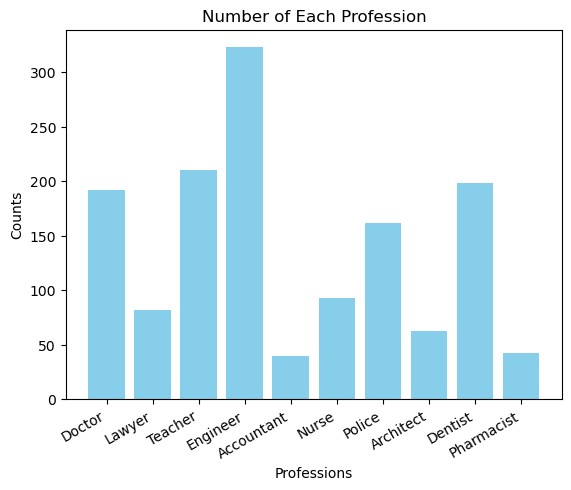

In [109]:
# Creaating two lists from dictionary one that stores professions and 
professions = list(profession_counts.keys())
counts = list(profession_counts.values())

# Create the bar chart
plt.bar(professions, counts, color='skyblue')
plt.xlabel('Professions')
plt.ylabel('Counts')
plt.title('Number of Each Profession')
plt.xticks(rotation=30, ha='right') #rotating the labels as it was mixing into each other

# Show the plot
plt.show()


# COSINE SIMILARITY

In [110]:
alphabets = 'abcdefghijklmnopqrstuvwxyz' #string to test if the alphabet is in word or not

"""this module contians two loops that cycle through each misspelled word and vectorize it, as it cos similarity we are also taking account
of number of times the letter occurs in the word"""

def vectorize_words(words):
    # empty list to store vectors
    vectors = []
    
    # iterating through each word in the words list
    for word in words:
        # declaring an empty vector for the current word
        vector = []
        # iterate through each alphabet
        for char in alphabets:
            # count the occurrence of the alphabet in the word
            count = word.count(char)
            # appending the count to the vector
            vector.append(count)
        # appending the vector to the list of vectors
        vectors.append(vector)
    
    # converting the list of vectors to a numpy array and returning it
    return np.array(vectors)

#calling vectorize function to vectorize both sample lists
misspelled_sample_vector=(vectorize_words(lower_misspelled_sample))
#print(misspelled_sample_vector)

correct_sample_vector=(vectorize_words(lower_correct_sample))
#print(correct_sample_vector)

#again the double loop module, this time it doesn't call any other logic module as, it was simple and calculated here only in one line
def associate_words(misspelled_sample_vector, correct_sample_vector, misspelled_sample, correct_sample):
    combined = []
    corrected=[]
    
    for i in range(len(misspelled_sample_vector)):
        max_similarity = 0
        associated_word = None
        
        for j in range(len(correct_sample_vector)):
            #this is the line that calculates similarity without calling any other function or module, this is used to calculate cos from dot product
            similarity = (sum((misspelled_sample_vector[i]*correct_sample_vector[j]))/((m.sqrt(sum(misspelled_sample_vector[i]**2)))*(m.sqrt(sum(correct_sample_vector[j]**2)))))
            if similarity > max_similarity:
                max_similarity = similarity
                associated_word = correct_sample[j]
        corrected.append(associated_word)
        combined.append((misspelled_sample[i], associated_word, max_similarity))
    return combined, corrected

combined, corrected = associate_words(misspelled_sample_vector, correct_sample_vector, misspelled_sample, correct_sample)
print(combined)

[('dentiists', 'Dentist', 0.9467292624062573), ('Enginir', 'Engineer', 0.82915619758885), ('PoLICE', 'Police', 1.0000000000000002), ('engneiear', 'Engineer', 0.9701425001453319), ('DOcTRO', 'Doctor', 0.9999999999999998), ('dentists', 'Dentist', 0.9622504486493763), ('POLICE', 'Police', 1.0000000000000002), ('enjeineaar', 'Engineer', 0.8385254915624211), ('DENTISTT', 'Dentist', 0.9799578870122228), ('nusye', 'Nurse', 0.7999999999999998), ('tEaCHEr', 'Teacher', 1.0), ('docktor', 'Doctor', 0.9428090415820632), ('nusre', 'Nurse', 0.9999999999999998), ('architeft', 'Architect', 0.9198662110078), ('tEACHEr', 'Teacher', 1.0), ('engeineer', 'Engineer', 0.9904434667711052), ('dentists', 'Dentist', 0.9622504486493763), ('POLicE', 'Police', 1.0000000000000002), ('ENJINEER', 'Engineer', 0.9375), ('engeniiar', 'Engineer', 0.9036961141150639), ('enginear', 'Engineer', 0.9381941874331419), ('accounTAnT', 'Accountant', 1.0000000000000002), ('TEacher', 'Teacher', 1.0), ('POLIcE', 'Police', 1.0000000000

In [111]:
# Initialize a dictionary with professions of interest as key
profession_counts = {profession: 0 for profession in correct_sample}

# Count the occurrences of each profession in the corrected list
for profession in corrected:
    if profession in profession_counts:
        profession_counts[profession] += 1

print(profession_counts)

{'Doctor': 190, 'Lawyer': 82, 'Teacher': 209, 'Engineer': 328, 'Accountant': 34, 'Nurse': 85, 'Police': 162, 'Architect': 70, 'Dentist': 192, 'Pharmacist': 53}


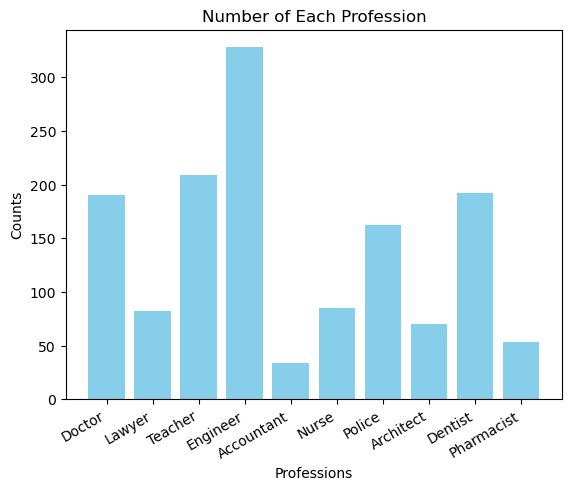

In [112]:
# Creaating two lists from dictionary one that stores professions and 
professions = list(profession_counts.keys())
counts = list(profession_counts.values())

# Create the bar chart
plt.bar(professions, counts, color='skyblue')
plt.xlabel('Professions')
plt.ylabel('Counts')
plt.title('Number of Each Profession')
plt.xticks(rotation=30, ha='right') #rotating the labels as it was mixing into each other

# Show the plot
plt.show()


# JACCARD SIMILARITY

In [113]:
alphabets = 'abcdefghijklmnopqrstuvwxyz'

#in this vectorization we only count unique letters
def vectorize_words(words):
    # initializing an empty list to store vectors
    vectors = []
    
    # iterating through each word in the given array
    for word in words:
        # declarintg empty list for the current word
        vector = []
        # Iterate through each alphabet
        for char in alphabets:
            # checking if the alphabet is present in the word
            if char in word:
                vector.append(1)
            else:
                vector.append(0)
        # Append the vector to the list of vectors
        vectors.append(vector)
    
    # Convert the list of vectors to a numpy array
    return np.array(vectors)

misspelled_sample_vector=(vectorize_words(lower_misspelled_sample))
#print(misspelled_sample_vector)

correct_sample_vector=(vectorize_words(lower_correct_sample))
#print(correct_sample_vector)

#this function/module calculates intersection and union, respectively, of the input numpy array
def jaccard_similarity(set1, set2):
    intersection = np.logical_and(set1, set2).sum() #first we apply logical and then sum all the instances of intersection
    union = np.logical_or(set1, set2).sum()
    return intersection / union if union != 0 else 0

#this loop again which call the jaccard_similarity function/module
def associate_words(misspelled_sample_vector, correct_sample_vector, misspelled_sample, correct_sample):
    combined = []
    corrected=[]
    
    for i in range(len(misspelled_sample_vector)):
        max_similarity = 0
        associated_word = None
        
        for j in range(len(correct_sample_vector)):
            similarity = jaccard_similarity(misspelled_sample_vector[i], correct_sample_vector[j])
            if similarity > max_similarity:
                max_similarity = similarity
                associated_word = correct_sample[j]
        corrected.append(associated_word)
        combined.append((misspelled_sample[i], associated_word, max_similarity))
    return combined, corrected

combined, corrected = associate_words(misspelled_sample_vector, correct_sample_vector, misspelled_sample, correct_sample)
print(combined)

[('dentiists', 'Dentist', 1.0), ('Enginir', 'Engineer', 1.0), ('PoLICE', 'Police', 1.0), ('engneiear', 'Engineer', 0.8333333333333334), ('DOcTRO', 'Doctor', 1.0), ('dentists', 'Dentist', 1.0), ('POLICE', 'Police', 1.0), ('enjeineaar', 'Engineer', 0.5714285714285714), ('DENTISTT', 'Dentist', 1.0), ('nusye', 'Nurse', 0.6666666666666666), ('tEaCHEr', 'Teacher', 1.0), ('docktor', 'Doctor', 0.8333333333333334), ('nusre', 'Nurse', 1.0), ('architeft', 'Architect', 0.875), ('tEACHEr', 'Teacher', 1.0), ('engeineer', 'Engineer', 1.0), ('dentists', 'Dentist', 1.0), ('POLicE', 'Police', 1.0), ('ENJINEER', 'Engineer', 0.6666666666666666), ('engeniiar', 'Engineer', 0.8333333333333334), ('enginear', 'Engineer', 0.8333333333333334), ('accounTAnT', 'Accountant', 1.0), ('TEacher', 'Teacher', 1.0), ('POLIcE', 'Police', 1.0), ('denstists', 'Dentist', 1.0), ('pharmaccist', 'Pharmacist', 1.0), ('doktur', 'Doctor', 0.5714285714285714), ('POlICE', 'Police', 1.0), ('DEIST', 'Dentist', 0.8333333333333334), ('do

In [114]:
# Initialize a dictionary with professions of interest as key
profession_counts = {profession: 0 for profession in correct_sample}

# Count the occurrences of each profession in the corrected list
for profession in corrected:
    if profession in profession_counts:
        profession_counts[profession] += 1

print(profession_counts)

{'Doctor': 209, 'Lawyer': 82, 'Teacher': 213, 'Engineer': 330, 'Accountant': 32, 'Nurse': 83, 'Police': 162, 'Architect': 60, 'Dentist': 192, 'Pharmacist': 42}


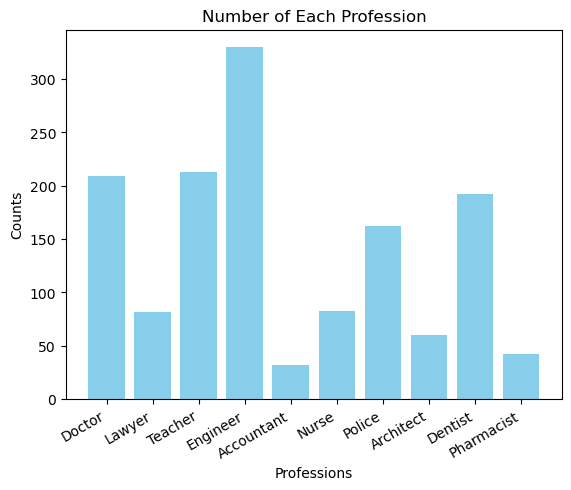

In [115]:
# Creaating two lists from dictionary one that stores professions and 
professions = list(profession_counts.keys())
counts = list(profession_counts.values())

# Create the bar chart
plt.bar(professions, counts, color='skyblue')
plt.xlabel('Professions')
plt.ylabel('Counts')
plt.title('Number of Each Profession')
plt.xticks(rotation=30, ha='right') #rotating the labels as it was mixing into each other

# Show the plot
plt.show()


# LEVENSHTEIN

In [116]:
#we use matrix method to implement levenshtein as recursion method takes so much time to calculate minimum distance
def levenshtein_distance(a: str, b: str):
    m, n = len(a), len(b)
    d = np.zeros((m+1, n+1), dtype=int) #creating a 2d array with zeros in all the cells
        
    # when the other string is empty, distance is length of non-empty string
    for i in range(m + 1):
        d[i][0] = i
    for j in range(n + 1):
        d[0][j] = j
    
    for j in range(1, n+1):
        for i in range(1, m+1):
            if a[i-1] != b[j-1]: #if letters are not equal the cost increments by 1
                cost = 1
            else:
                cost= 0
            """we want to minimize the cost of whole shenanigan of converting one word to another, so that when we should be substituting we are not
            removing and then inserting, which is more costly"""
            d[i, j] = min(d[i-1, j-1] + cost, d[i, j-1]   + 1, d[i-1, j]   + 1)
    
    return d[m, n] #returing the rightest and bottom most cell of the matrix

#this loop this times stores minimum distance in min similarity and calls levenshtein
def associate_words(lower_misspelled_sample, lower_correct_sample, misspelled_sample, correct_sample):
    combined = []
    corrected=[]
    
    for i in range(len(lower_misspelled_sample)):
        min_similarity = float('inf')
        associated_word = None
        
        for j in range(len(lower_correct_sample)):
            similarity = levenshtein_distance(lower_misspelled_sample[i], lower_correct_sample[j])
            if similarity < min_similarity:
                min_similarity = similarity
                associated_word = correct_sample[j]
        corrected.append(associated_word)
        combined.append((misspelled_sample[i], associated_word, min_similarity))
    return combined, corrected

combined, corrected = associate_words(lower_misspelled_sample, lower_correct_sample, misspelled_sample, correct_sample)
print(combined)

[('dentiists', 'Dentist', 2), ('Enginir', 'Engineer', 2), ('PoLICE', 'Police', 0), ('engneiear', 'Engineer', 3), ('DOcTRO', 'Doctor', 2), ('dentists', 'Dentist', 1), ('POLICE', 'Police', 0), ('enjeineaar', 'Engineer', 4), ('DENTISTT', 'Dentist', 1), ('nusye', 'Nurse', 2), ('tEaCHEr', 'Teacher', 0), ('docktor', 'Doctor', 1), ('nusre', 'Nurse', 2), ('architeft', 'Architect', 1), ('tEACHEr', 'Teacher', 0), ('engeineer', 'Engineer', 1), ('dentists', 'Dentist', 1), ('POLicE', 'Police', 0), ('ENJINEER', 'Engineer', 1), ('engeniiar', 'Engineer', 4), ('enginear', 'Engineer', 1), ('accounTAnT', 'Accountant', 0), ('TEacher', 'Teacher', 0), ('POLIcE', 'Police', 0), ('denstists', 'Dentist', 2), ('pharmaccist', 'Pharmacist', 1), ('doktur', 'Doctor', 2), ('POlICE', 'Police', 0), ('DEIST', 'Dentist', 2), ('doctuor', 'Doctor', 1), ('dentists', 'Dentist', 1), ('doktoor', 'Doctor', 2), ('DENISST', 'Dentist', 2), ('doctore', 'Doctor', 1), ('lAWYREE', 'Lawyer', 2), ('denttst', 'Dentist', 1), ('dactar', 'D

In [117]:
# Initialize a dictionary with professions of interest as key
profession_counts = {profession: 0 for profession in correct_sample}

# Count the occurrences of each profession in the corrected list
for profession in corrected:
    if profession in profession_counts:
        profession_counts[profession] += 1

print(profession_counts)

{'Doctor': 224, 'Lawyer': 82, 'Teacher': 195, 'Engineer': 328, 'Accountant': 32, 'Nurse': 85, 'Police': 162, 'Architect': 63, 'Dentist': 192, 'Pharmacist': 42}


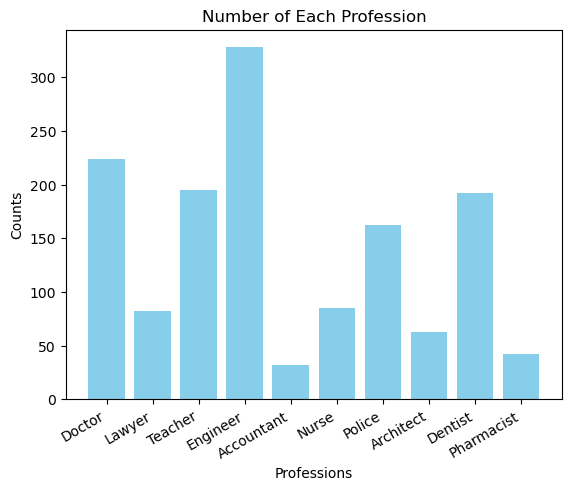

In [118]:
# Creaating two lists from dictionary one that stores professions and 
professions = list(profession_counts.keys())
counts = list(profession_counts.values())

# Create the bar chart
plt.bar(professions, counts, color='skyblue')
plt.xlabel('Professions')
plt.ylabel('Counts')
plt.title('Number of Each Profession')
plt.xticks(rotation=30, ha='right') #rotating the labels as it was mixing into each other

# Show the plot
plt.show()
